In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas

import numpy as np

ship = pandas.read_csv("data/ship_train.csv")

print(ship.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [2]:
print(ship.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
ship["Age"] = ship["Age"].fillna(ship["Age"].median())

print(ship.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
# 将字符用数值代表

# sex是字符串，无法进行计算，将它转换为数字，用0代表man，用1代表female

print (ship["Sex"].unique())

# 将所有的male替换为数字0

ship.loc[ship["Sex"] == "male", "Sex"] = 0

ship.loc[ship["Sex"] == "female", "Sex"] = 1

['male' 'female']


In [5]:
print(ship["Embarked"].unique())

# 登船的地点也是字符串，需要转换为数字，并填充缺失值

ship["Embarked"] = ship["Embarked"].fillna('S')

# loc通过索引获取数据

ship.loc[ship["Embarked"] == "S", "Embarked"] = 0

ship.loc[ship["Embarked"] == "C", "Embarked"] = 1

ship.loc[ship["Embarked"] == "Q", "Embarked"] = 2

['S' 'C' 'Q' nan]


In [12]:
# 机器学习算法(线性回归)
# 导入线性回归,使用回归算法(二分类)进行预测
from sklearn.linear_model import LinearRegression

# 导入交叉验证
from sklearn.model_selection import KFold

In [14]:
# 用来预测目标的列

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# 对线性回归类进行实例化

alg = LinearRegression()

# 为泰坦尼克号数据集生成交叉验证折叠，它返回与训练和测试相对应的行索引

# 设置random_state，以确保每次运行时都得到相同的分割

kf = KFold(n_splits=3, random_state=1, shuffle=True)

In [19]:
predictions = []

for train, test in kf.split(ship):

    train_predictors = (ship[predictors].iloc[train,:])

    # 训练算法的目标

    train_target = ship["Survived"].iloc[train]

    # 利用预测器和目标训练算法

    alg.fit(train_predictors, train_target)

    # 现在可以在测试折叠部分做出预测

    test_predictions = alg.predict(ship[predictors].iloc[test,:])

    predictions.append(test_predictions)

In [20]:
predictions = np.concatenate(predictions, axis=0)

# 将预测映射到结果(只有可能的结果是1和0)

predictions[predictions > .5] = 1

predictions[predictions <= .5] = 0

accuracy = sum(predictions[predictions == ship["Survived"]]) / len(predictions)

print(accuracy)

0.13468013468013468


In [22]:
# 逻辑回归(概率值)

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(random_state=1)

# 计算所有交叉验证折叠的准确率

scores = cross_val_score(alg, ship[predictors], ship["Survived"], cv=3)

# 取分数的平均值(因为每一组都有一个分数)

print(scores.mean())

# 注意，逻辑回归和线性回归得到的结果类型不一样，逻辑回归是概率值，线性回归是[0,1]区间的数值

0.7957351290684623


In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# 用默认参数初始化算法

# n_estimators就是我们要生成的树的数量

# min_samples_split是进行拆分所需的最少行数

# min_samples_leaf是我们在树枝末端(树的底部点)可以得到的最小样本数量

alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

# 计算所有交叉验证折叠的准确率

kf = KFold(n_splits=3, random_state=1, shuffle=True)

scores = cross_val_score(alg, ship[predictors], ship["Survived"], cv=kf)

# 取分数的平均值(因为每一组都有一个分数)

print(scores.mean())

0.7957351290684626


In [27]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)

# 计算所有交叉验证折叠的准确率
kf = KFold(n_splits=3, random_state=1, shuffle=True)
scores = cross_val_score(alg, ship[predictors], ship["Survived"], cv=kf)

# 取分数的平均值
print(scores.mean())

0.8260381593714926


In [28]:
# 生成一个FamilySize列
ship["FamilySize"] = ship["SibSp"] + ship["Parch"]

# apply方法生成一个新的列
ship["NameLength"] = ship["Name"].apply(lambda x: len(x))

In [30]:
import re

#从名称中获取标题的函数.
def get_title(name):
    # 使用正则表达式搜索标题。标题总是由大写字母和小写字母组成，以句号结尾。
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # 如果标题存在，提取并返回它.
    if title_search:
        return title_search.group(1)
    return ""

# 获取所有标题并打印出每个标题出现的频率。
titles = ship["Name"].apply(get_title)
print(pandas.value_counts(titles))

# 将每个标题映射为整数。有些标题非常罕见，它们被压缩成与其他标题相同的代码。
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# 验证我们转换了的所有东西
print(pandas.value_counts(titles))

# 添加到标题列.
ship["Title"] = titles

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
Name
1     517
2     183
3     125
4      40
5       7
6       6
7       5
8       3
10      3
9       2
Name: count, dtype: int64


In [33]:
import numpy as np

from sklearn.feature_selection import SelectKBest, f_classif

import matplotlib.pyplot as plt

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]
# 进行特征选择

selector = SelectKBest(f_classif, k=5)

selector.fit(ship[predictors], ship["Survived"])

#获取每个特性的原始p值，并将p值转换为分数

scores = -np.log10(selector.pvalues_)

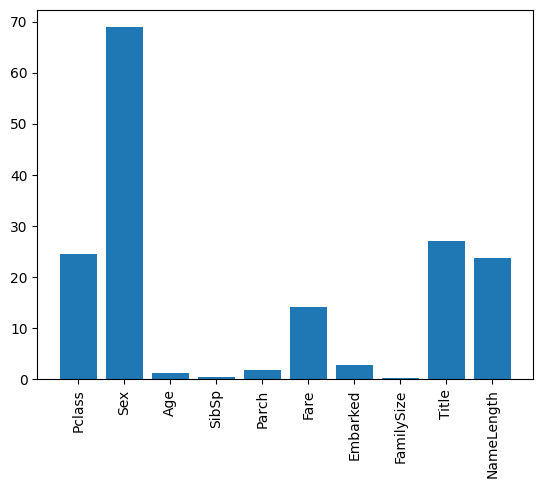

In [34]:
# 画出成绩，看看“Pclass”“Sex”“Title”和“Fare”怎样才是最好的

plt.bar(range(len(predictors)), scores)

plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.savefig('Images/01Main-01.png', bbox_inches='tight')
plt.show()

# 只选择4个最好的功能

predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)

In [36]:
# 通过以上特征的重要性分析，选择出4个最重要的特性，重新进行随机森林算法的运算
predictors = ["Pclass", "Sex", "Fare", "Title"]
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)

# 进行交叉验证
kf = KFold(n_splits=3, random_state=1, shuffle=True)
scores = cross_val_score(alg, ship[predictors], ship["Survived"], cv=kf)

# 目前的结果并无明显提升，本处理是为了练习在随机森林中的特征选择。它对于实际的数据挖掘具有重要意义
print(scores.mean())

0.819304152637486


In [38]:
from sklearn import ensemble
from sklearn.model_selection import cross_validate

# 我们要集成的算法.
# 我们使用了线性预测器来进行逻辑回归，以及使用梯度提升分类器.
voting_est = [
    ('gbc', GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=5)),
    ('lr', LogisticRegression(random_state=1)),
]

predictors = ["Pclass", "Sex","Fare", "FamilySize", "Title", "Age", "Embarked"]

# Soft Vote or weighted probabilities
voting_soft = ensemble.VotingClassifier(estimators=voting_est, voting='soft')
voting_soft_cv = cross_validate(voting_soft, ship[predictors], ship["Survived"], cv=kf)
voting_soft.fit(ship[predictors], ship["Survived"])
print("Soft Voting Test w/bin score mean: {:.2f} %".format(voting_soft_cv['test_score'].mean() * 100))

Soft Voting Test w/bin score mean: 83.73 %
